# Importing neccessary libraries and data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data/data.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Data cleaning

In [4]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.duplicated().sum()

0

**There doesn't seem to be any missing values or duplicates in the data.**

In [7]:
df.shape

(1000, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [11]:
cols=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for col in cols:
    print("Categories in",  col, "variable:", end=" ")
    print(df[col].unique())

Categories in gender variable: ['female' 'male']
Categories in race/ethnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental level of education variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable: ['standard' 'free/reduced']
Categories in test preparation course variable: ['none' 'completed']


In [12]:
numeric_features= df.select_dtypes(exclude=['object']).columns.tolist()
categorical_features= df.select_dtypes(include=['object']).columns.tolist()

print("We have {} numerical features: {}".format(len(numeric_features), numeric_features))
print("\nWe have {} categorical features: {}".format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']

We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


**Let's create two more columns 'Total score' and 'Average score' for now.**

In [14]:
# df['Total score']=df['math score']+df['reading score']+df['writing score']
# df['Average score']=df['Total score']/3
# df.head()

## Data Analysis

Let's see how marks are distributed across genders.

In [24]:
# fig, axes=plt.subplots(1,2, figsize=(12,5))

# sns.histplot(data=df, x='Total score', hue='gender', bins=50, legend=True, kde=True, ax=axes[0])

# sns.histplot(data=df, x='Average score', hue='gender', bins=50, legend=True, kde=True, ax=axes[1])

**Female appear to have better 'Total score' and 'Average score' than men.**


GENDER SUMMARY:
       reading score       writing score      
                mean count          mean count
gender                                        
female          73.0   518          72.0   518
male            65.0   482          63.0   482
--------------------------------------------------

RACE/ETHNICITY SUMMARY:
               reading score       writing score      
                        mean count          mean count
race/ethnicity                                        
group A                 65.0    89          63.0    89
group B                 67.0   190          66.0   190
group C                 69.0   319          68.0   319
group D                 70.0   262          70.0   262
group E                 73.0   140          71.0   140
--------------------------------------------------

PARENTAL LEVEL OF EDUCATION SUMMARY:
                            reading score       writing score      
                                     mean count          mean count
parenta

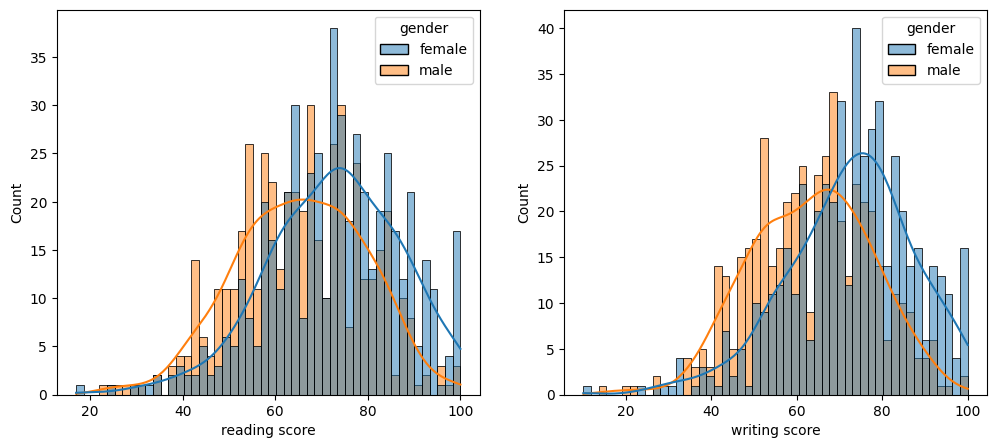

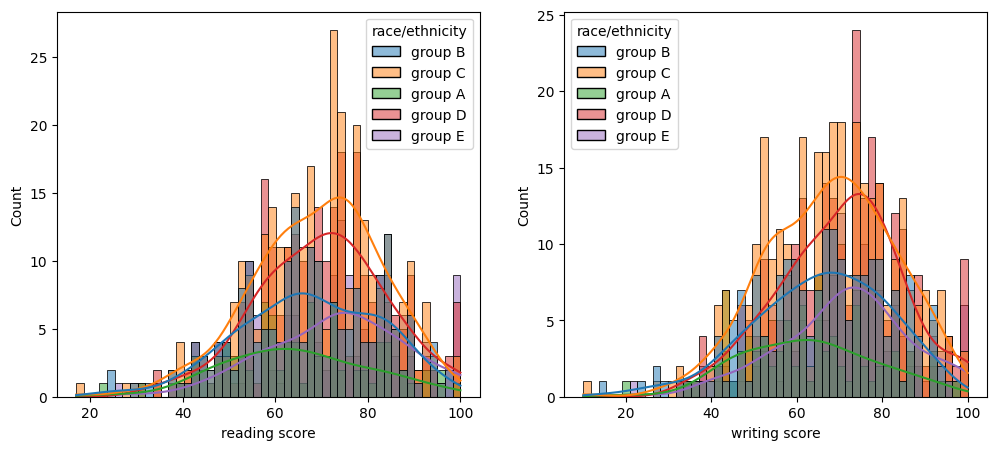

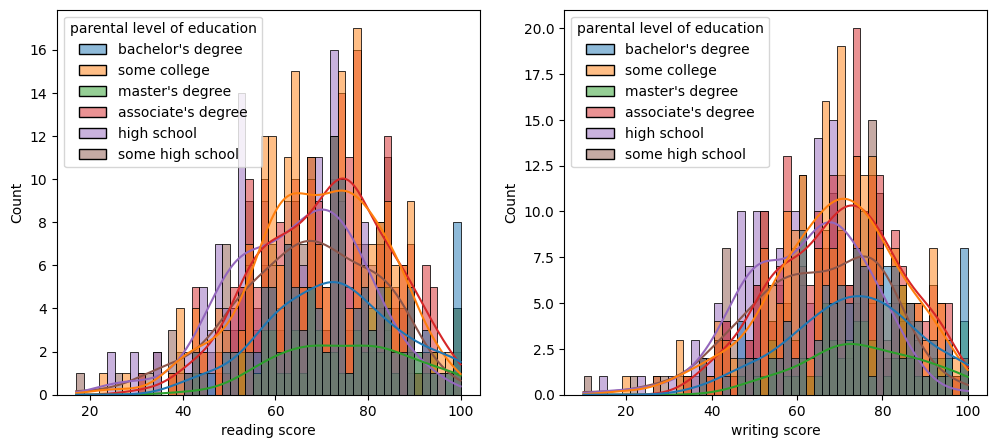

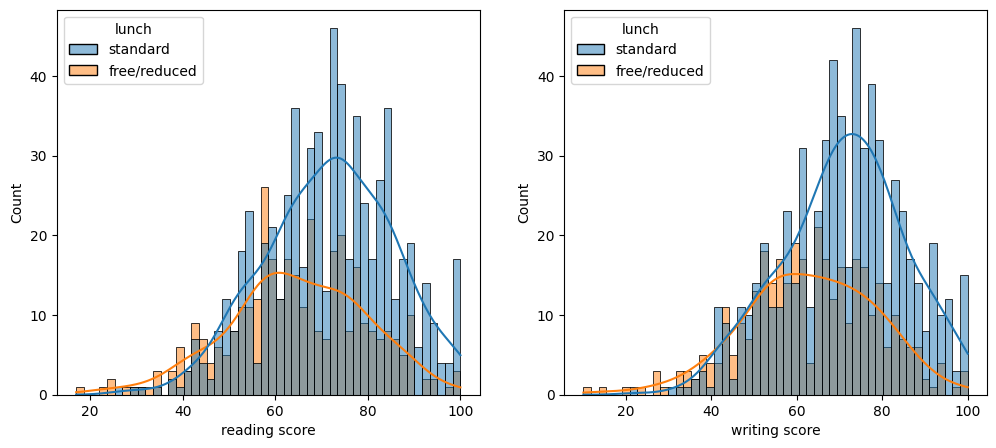

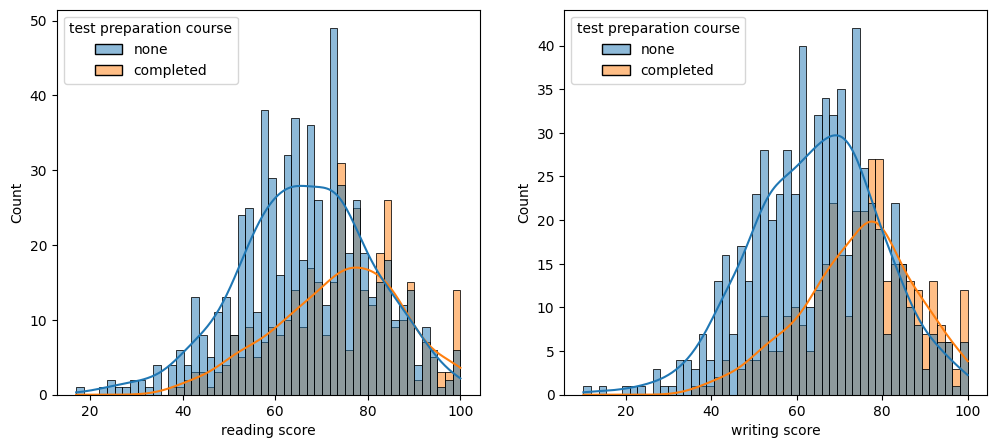

In [27]:
cols=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for col in cols:
    fig, axes=plt.subplots(1,2, figsize=(12,5))
    sns.histplot(data=df, x='reading score', hue=col, bins=50, legend=True, kde=True, ax=axes[0])
    sns.histplot(data=df, x='writing score', hue=col, bins=50, legend=True, kde=True, ax=axes[1])

    print(f"\n{col.upper()} SUMMARY:")
    print(df.groupby(col)[['reading score', 'writing score']].agg(['mean', 'count']).round(0))
    print("-" * 50)

## Reading score & Writing score
- **Gender**: Female students' average scores are better than those of males.
- **Race/Ethinicity**: group E > group D > group C > group B > group A
- **Parental level of education**: master's > bachelor's > associate's > some college > some high school > high school
- **Lunch**: Students with standard lunch score better than free/reduced.
- **Test preparation course**: Students who finished the course score better on average than those who didn't.

In [32]:
cols=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

for col in cols:
    sns.histplot(data=df, x='math score', hue=col, bins=50, legend=True, kde=True, ax=axes[0])

    print(f"\n{col.upper()} SUMMARY:")
    print(df.groupby(col)[['math score']].agg(['mean', 'count']).round(0))
    print("-" * 50)


GENDER SUMMARY:
       math score      
             mean count
gender                 
female       64.0   518
male         69.0   482
--------------------------------------------------

RACE/ETHNICITY SUMMARY:
               math score      
                     mean count
race/ethnicity                 
group A              62.0    89
group B              63.0   190
group C              64.0   319
group D              67.0   262
group E              74.0   140
--------------------------------------------------

PARENTAL LEVEL OF EDUCATION SUMMARY:
                            math score      
                                  mean count
parental level of education                 
associate's degree                68.0   222
bachelor's degree                 69.0   118
high school                       62.0   196
master's degree                   70.0    59
some college                      67.0   226
some high school                  63.0   179
-------------------------------------

## Data preparation for machine learning

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [37]:
numeric_features=['math score', 'reading score', 'writing score']
categorical_features=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

In [39]:
scaler=StandardScaler()
encoder=OneHotEncoder(drop='first', sparse=False)

In [41]:
preprocessor=ColumnTransformer(
    transformers=[
        ("num", scaler, numeric_features),
        ("cat", encoder, categorical_features)
    ])

In [43]:
preprocessed=preprocessor.fit_transform(df)
column_names=preprocessor.get_feature_names_out()

In [45]:
preprocessed_data= pd.DataFrame(preprocessed, columns=column_names)
preprocessed_data.head()

,num__math score,num__reading score,num__writing score,cat__gender_male,cat__race/ethnicity_group B,cat__race/ethnicity_group C,cat__race/ethnicity_group D,cat__race/ethnicity_group E,cat__parental level of education_bachelor's degree,cat__parental level of education_high school,cat__parental level of education_master's degree,cat__parental level of education_some college,cat__parental level of education_some high school,cat__lunch_standard,cat__test preparation course_none
0,0.390024,0.193999,0.391492,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.192076,1.427476,1.313269,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.577711,1.770109,1.642475,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,-1.259543,-0.833899,-1.583744,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.653954,0.605158,0.457333,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0


In [47]:
preprocessed_data.to_csv('preprocessed_data.csv')